# Personal Protection Equipment Detection model
This notebook shows how you can use Python API to perform inference on endpoint created from the model

### 1. Start the trial or buy our VitechLab PPE model on AWS Marketplace

You can find our model here: https://aws.amazon.com/marketplace/pp/prodview-b53upp27dnmzq

### 2. Create a new endpoint using AWS SageMaker Python API or SageMaker console
You can find our example here: [PPE Detection model deployment and usage](https://github.com/VITechLab/aws-sagemaker-examples/blob/master/Laboratory-PPE-Detector/Using-Laboratory-Personal-Protection-Equipment-Detection-model.ipynb)

### 3. Generating Prediction using `RealTimePredictor`

In [1]:
import sagemaker as sage

sess = sage.Session()
endpoint_name = 'ppe-bbb-model-example-endpoint'

predictor = sage.predictor.RealTimePredictor(
    endpoint_name,
    sagemaker_session=sess, 
    content_type="image/jpeg"
)

## Prediction for Laboratory\Medical protective equipment

In [3]:
import json

predict_args = {
        'CustomAttributes': json.dumps({
            'detection-elements': ['lab_coat', 'lab_no_glasses', 'lab_no_glove', 'lab_no_mask'],
        })
}

In [4]:
file_name = 'sample_data/input_lab/image7.jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    image_bytes = bytearray(f)

prediction_result = predictor.predict(image_bytes, predict_args).decode("utf-8")

In [5]:
result = json.loads(prediction_result)
result

[{'name': 'person',
  'percentage_probability': 99.94882345199585,
  'box_points': [301, 683, 2511, 3409],
  'classes': {'lab_no_glasses': 0.8309968747198582,
   'lab_no_glove': 0.018597469897940755,
   'lab_no_mask': 99.98270869255066,
   'lab_coat': 0.002882829176087398}}]

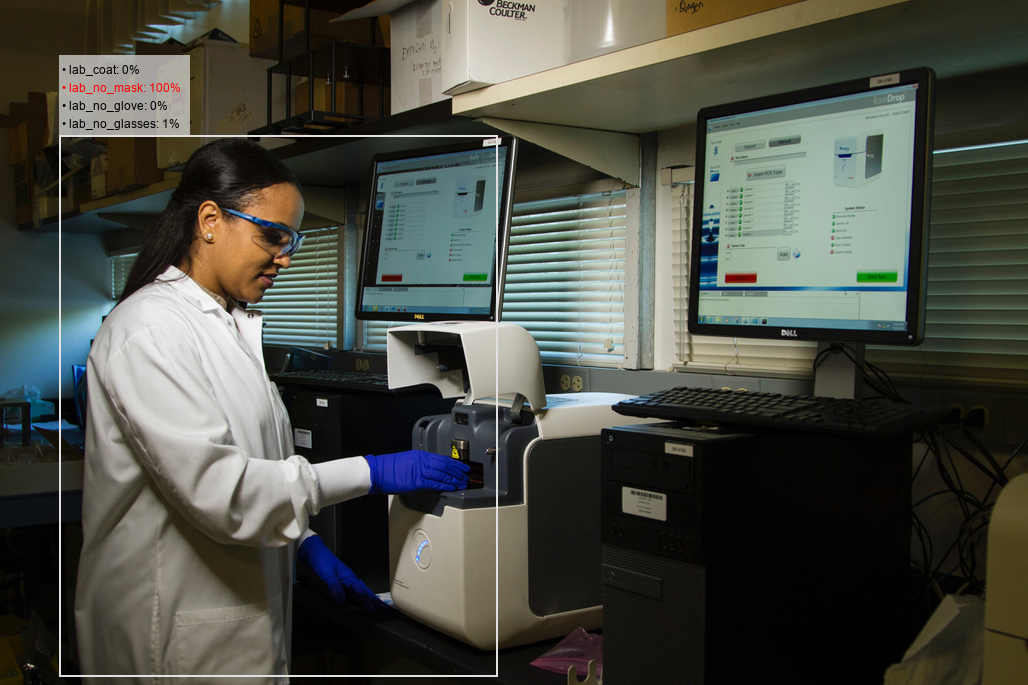

In [6]:
from utils import visualize_detection

visualize_detection(file_name, result)

## Prediction for Manufacturing\Construction protective equipment

In [7]:
import json

predict_args = {
        'CustomAttributes': json.dumps({
            'detection-elements': ['no_helmet', 'no_glasses', 'no_glove'],
        })
}

In [9]:
file_name = 'sample_data/input_manuf/58_30.worker-work-build...jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    image_bytes = bytearray(f)

prediction_result = predictor.predict(image_bytes, predict_args).decode("utf-8")

In [10]:
result = json.loads(prediction_result)
result

[{'name': 'person',
  'percentage_probability': 99.80244636535645,
  'box_points': [81, 440, 604, 1175],
  'glasses_faces': [],
  'classes': {'no_helmet': 1.1895648203790188,
   'no_glove': 69.07414197921753,
   'no_glasses': 0}}]

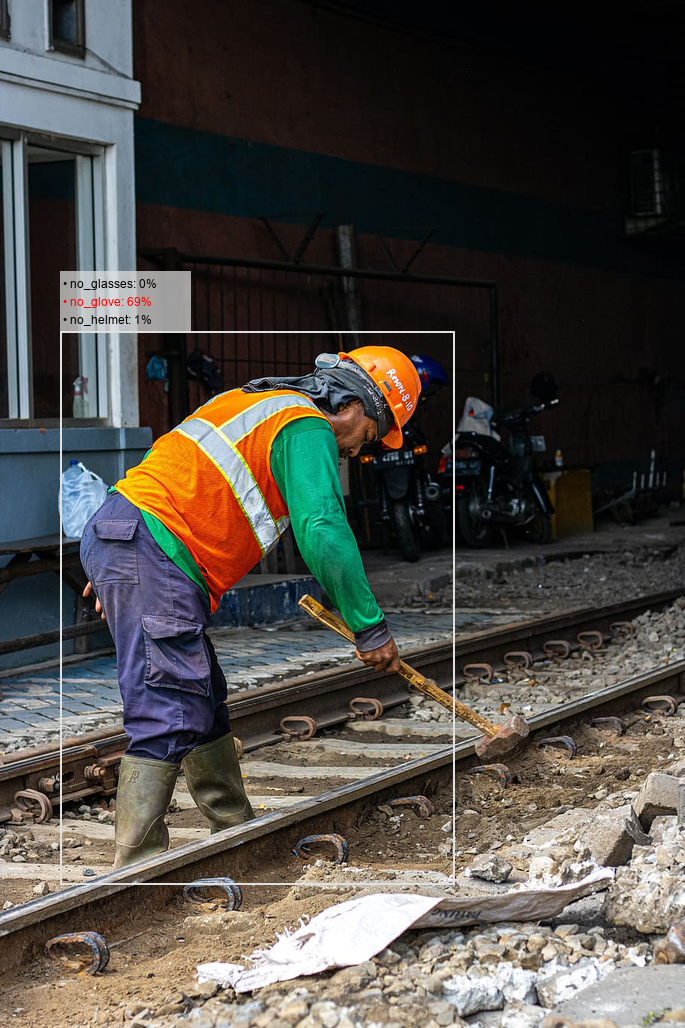

In [11]:
from utils import visualize_detection

visualize_detection(file_name, result)

### Delete the Endpoint
Having an endpoint running will incur some costs. Therefore as a clean-up job, we should delete the endpoint.

In [12]:
sess.delete_endpoint(predictor.endpoint)